# Heart Disease Prediction Model

## Importing necessary libraries

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Data Collection

In [10]:
#Load the dataset
file_path = 'heart-disease.csv'
data = pd.read_csv(file_path)
# Displaying the first few rows
print("Dataset Preview:")
display(data.head(10))

Dataset Preview:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1.0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1.0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,NaN
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1.0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1.0
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1.0
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1.0
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1.0
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1.0
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1.0


## Data Cleaning

In [13]:

print("\nChecking for missing values:")
print(data.isnull().sum())

# Since there are no missing values, proceed further
# If missing values existed, we would handle them here (e.g., imputation).




Checking for missing values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      1
dtype: int64


## Data Preprocessing

In [10]:
# Splitting features and target variable
X = data.drop(columns='target')  # Features
y = data['target']  # Target variable

# Standardizing feature values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Exploratory Data Analysis (EDA)

In [13]:

print("\nStatistical Summary:")
display(data.describe())


Statistical Summary:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000



Distribution of Target Variable:


/tmp/ipykernel_18491/3259276382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=data, palette='viridis')


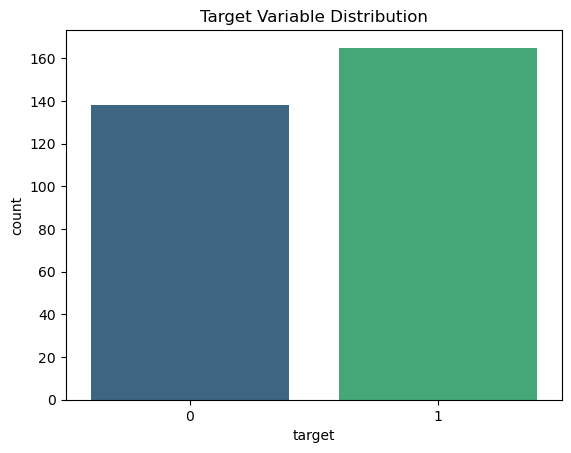

In [15]:
print("\nDistribution of Target Variable:")
sns.countplot(x='target', data=data, palette='viridis')
plt.title("Target Variable Distribution")
plt.show()

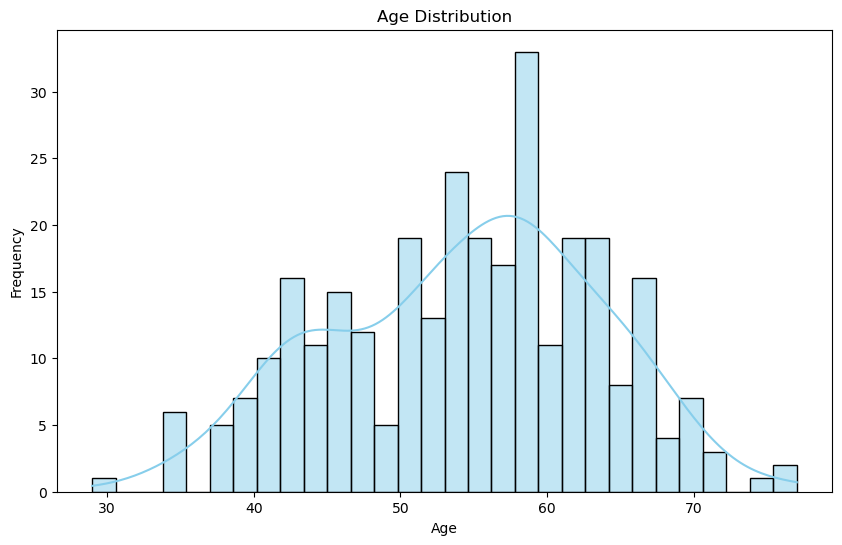

In [31]:
## Age Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=30, kde=True, color='skyblue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig('age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

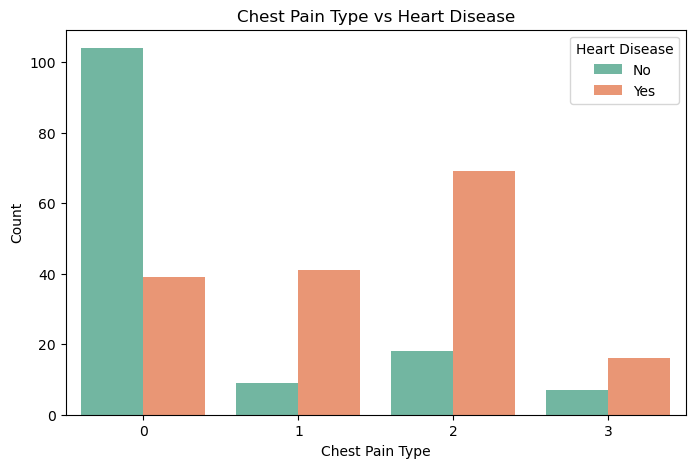

In [33]:
## Chest Pain Type vs Target
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='target', data=data, palette='Set2')
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.savefig('Chest Pain Type vs Heart Disease.png', dpi=300, bbox_inches='tight')
plt.show()

/tmp/ipykernel_18491/2647923958.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='thalach', data=data, palette='cool')


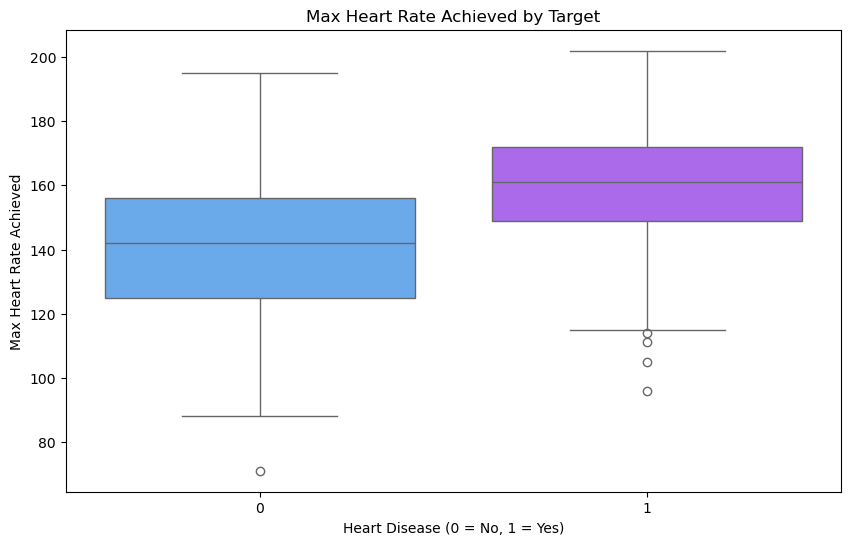

In [35]:
## Max Heart Rate Achieved vs Target
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='thalach', data=data, palette='cool')
plt.title("Max Heart Rate Achieved by Target")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Max Heart Rate Achieved")
plt.savefig('Max Heart Rate Achieved by Target.png', dpi=300, bbox_inches='tight')
plt.show()


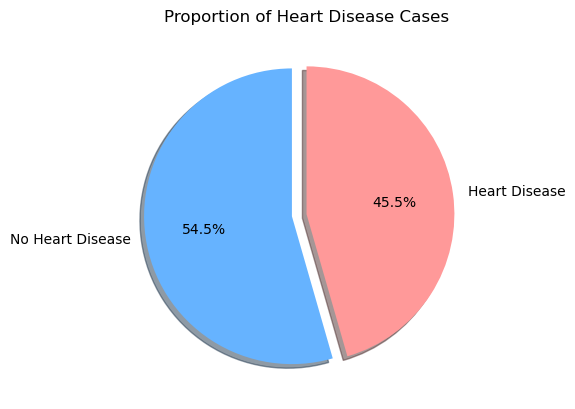

In [39]:
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title("Proportion of Heart Disease Cases")
plt.savefig('Proportion of Heart Disease Cases.png', dpi=300, bbox_inches='tight')
plt.show()

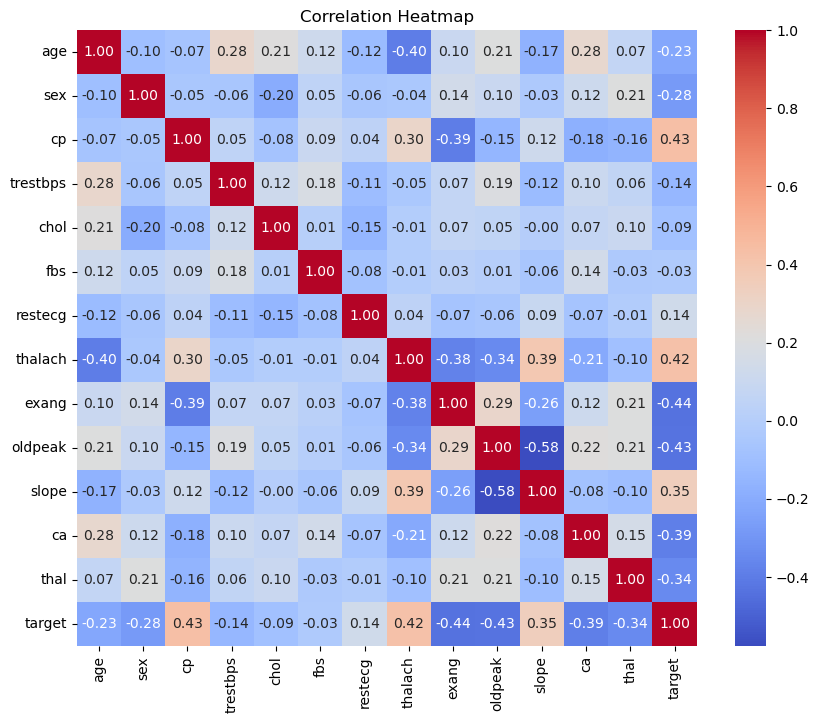

In [82]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

/tmp/ipykernel_14772/1515151634.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='age', data=data, palette='coolwarm')


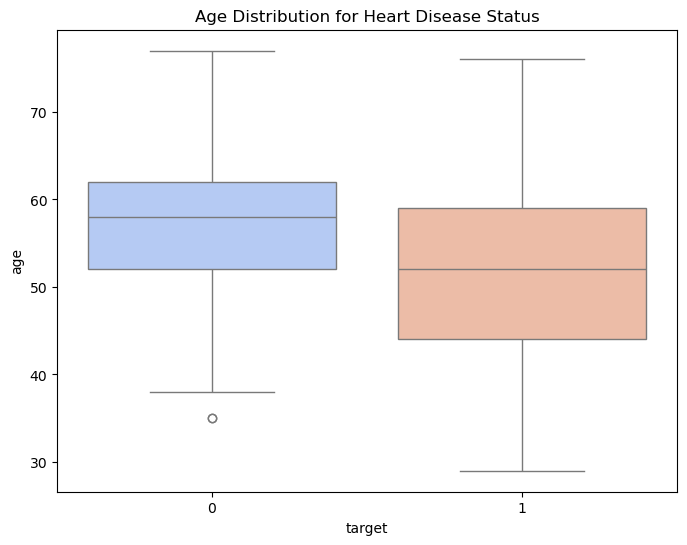

In [83]:
# Age distribution based on heart disease status
plt.figure(figsize=(8, 6))
sns.boxplot(x='target', y='age', data=data, palette='coolwarm')
plt.title("Age Distribution for Heart Disease Status")
plt.show()

## Training the Prediction Model

In [87]:
# Using Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [89]:
# Evaluating the model
y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))



Model Evaluation:
Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



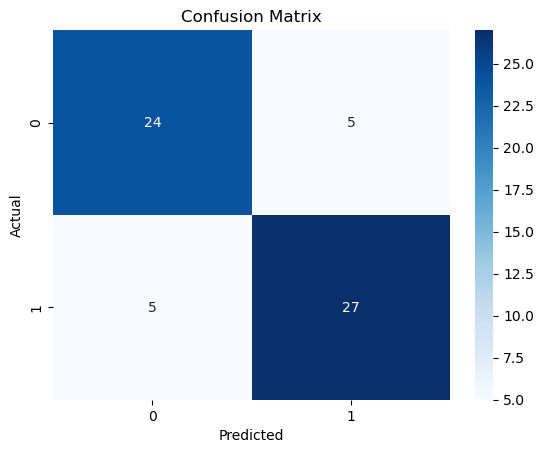

In [91]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Risk Level Prediction Function

In [94]:

def risk_level_prediction(input_data):
    """
    Predicts the risk level for a given input.
    Risk levels:
    - 0: No Risk
    - 1: Low Risk
    - 2: Moderate Risk
    - 3: High Risk
    """
    # Convert input data to the model's scale
    input_scaled = scaler.transform([input_data])
    prediction = model.predict(input_scaled)[0]
    
    # Determine risk level
    if prediction == 0:
        risk = "No Risk"
        advice = "Maintain a healthy lifestyle. Regular checkups are advised."
    else:
        probabilities = model.predict_proba(input_scaled)[0]
        if probabilities[1] > 0.8:
            risk = "High Risk"
            advice = "Immediate medical attention is recommended. Consult a cardiologist."
        elif probabilities[1] > 0.5:
            risk = "Moderate Risk"
            advice = "Consider lifestyle changes like exercise, diet control, and stress management."
        else:
            risk = "Low Risk"
            advice = "Stay active and maintain a balanced diet. Regular monitoring is advised."
    
    return risk, advice

In [96]:
# Example Input: Predict for a patient
example_patient = [63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]  # Replace with user input
risk, recommendation = risk_level_prediction(example_patient)

print("\nExample Patient's Prediction:")
print(f"Risk Level: {risk}")
print(f"Recommendation: {recommendation}")




Example Patient's Prediction:
Risk Level: Moderate Risk
Recommendation: Consider lifestyle changes like exercise, diet control, and stress management.


/home/samabishekraj/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [98]:
# Save the model and scaler for deployment
import joblib
joblib.dump(model, 'heart_disease_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("\nModel and Scaler saved for deployment.")


Model and Scaler saved for deployment.
